# Вариант 1

Загрузить файл с информацией о диабетах и построить модель классификации на основе имеющихся данных.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import warnings

In [14]:
import seaborn as sns

In [10]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#df2 = df.drop(columns=['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin'])
#df2

,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,33.6,0.627,50,1
1,85,26.6,0.351,31,0
2,183,23.3,0.672,32,1
3,89,28.1,0.167,21,0
4,137,43.1,2.288,33,1
...,...,...,...,...,...
763,101,32.9,0.171,63,0
764,122,36.8,0.340,27,0
765,121,26.2,0.245,30,0
766,126,30.1,0.349,47,1


In [8]:
df2.dtypes

Glucose                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
data["Glucose"]=data["Glucose"].replace(0,np.nan)
data["BloodPressure"]=data["BloodPressure"].replace(0,np.nan)
data["SkinThickness"]=data["SkinThickness"].replace(0,np.nan)
data["Insulin"]=data["Insulin"].replace(0,np.nan)
data["BMI"]=data["BMI"].replace(0,np.nan)

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Text(0.5, 1.0, ' Corelation Of Columns')

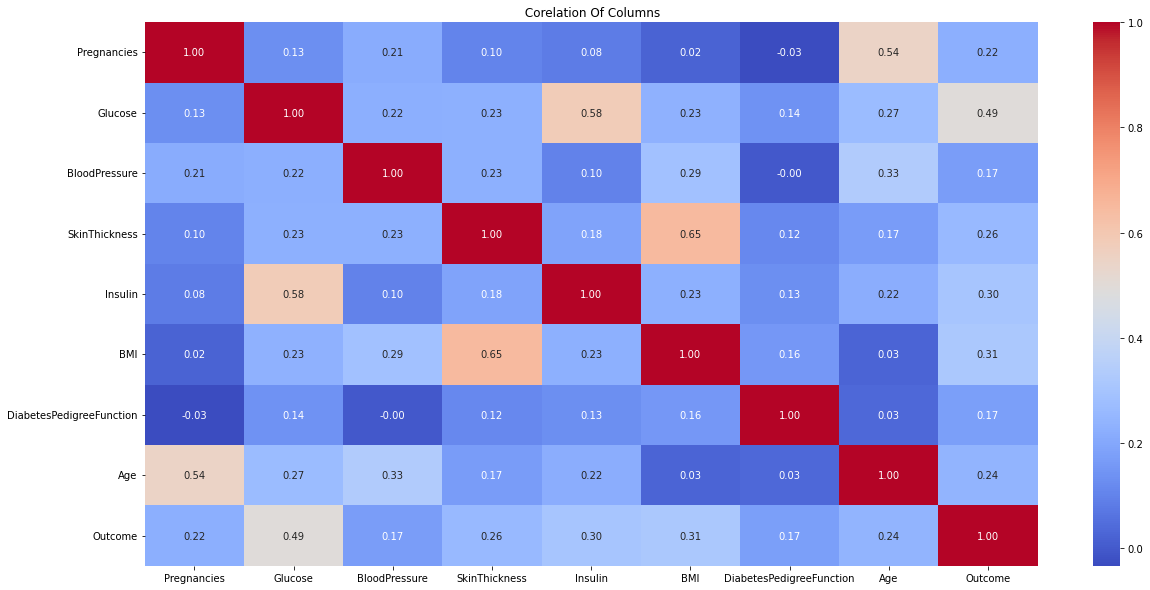

In [15]:
plt.figure(figsize=(20,10))
corr_columns = data.corr()
sns.heatmap(corr_columns,annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title('Corelation Of Columns')

In [16]:
data.fillna(data.median(), inplace=True)

In [17]:
data["Pregnancies"]=data["Pregnancies"].clip(lower=data["Pregnancies"].quantile(0.05),upper=data["Pregnancies"].quantile(0.95))
data["BloodPressure"]=data["BloodPressure"].clip(lower=data["BloodPressure"].quantile(0.05),upper=data["BloodPressure"].quantile(0.95))
data["SkinThickness"]=data["SkinThickness"].clip(lower=data["SkinThickness"].quantile(0.05),upper=data["SkinThickness"].quantile(0.95))
data["Insulin"]=data["Insulin"].clip(lower=data["Insulin"].quantile(0.05),upper=data["Insulin"].quantile(0.95))
data["BMI"]=data["BMI"].clip(lower=data["BMI"].quantile(0.05),upper=data["BMI"].quantile(0.95))
data["DiabetesPedigreeFunction"]=data["DiabetesPedigreeFunction"].clip(lower=data["DiabetesPedigreeFunction"].quantile(0.05),upper=data["DiabetesPedigreeFunction"].quantile(0.95))
data["Age"]=data["Age"].clip(lower=data["Age"].quantile(0.05),upper=data["Age"].quantile(0.95))

In [18]:
data["SkinThickness"]=data["SkinThickness"].clip(lower=data["SkinThickness"].quantile(0.07),upper=data["SkinThickness"].quantile(0.93))
data["Insulin"]=data["Insulin"].clip(lower=data["Insulin"].quantile(0.25),upper=data["Insulin"].quantile(0.75))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


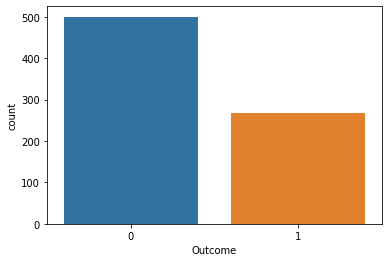

In [20]:
sns.countplot(data["Outcome"])
plt.show()

C:\Users\191741\AppData\Local\Temp/ipykernel_9604/1340010602.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),


<AxesSubplot:>

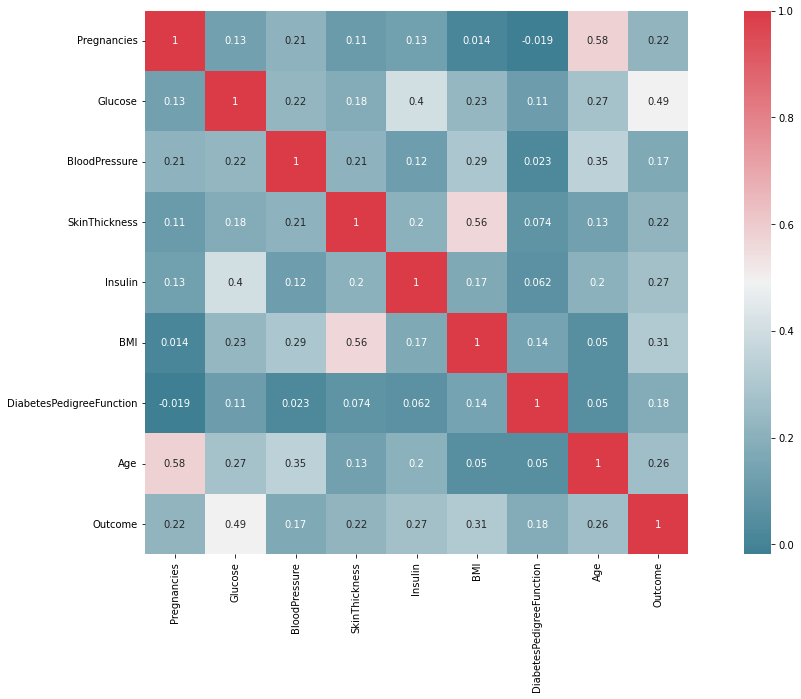

In [23]:
f,ax = plt.subplots(figsize=(20,10))

corr = data.corr("pearson")

sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),
          square=True,ax=ax,annot=True)

In [24]:
x = pd.DataFrame(data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']).values
y = data.Outcome.values.reshape(-1,1) # Target variable
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [37]:
model=LogisticRegression(solver='liblinear')
KFold=KFold(10)
results=cross_val_score(model,x,y.ravel(),cv=KFold)
results

array([0.71428571, 0.81818182, 0.72727273, 0.66233766, 0.77922078,
       0.79220779, 0.83116883, 0.81818182, 0.73684211, 0.81578947])

In [38]:
model.fit(x_train,y_train.ravel())

LogisticRegression(solver='liblinear')

In [48]:
y_pred = model.predict(x_test)
print("Точность: ", metrics.accuracy_score(y_test, y_pred))

Точность:  0.7987012987012987


In [43]:
model.predict_proba(x)


array([[0.25298459, 0.74701541],
       [0.95286671, 0.04713329],
       [0.23203681, 0.76796319],
       ...,
       [0.80152308, 0.19847692],
       [0.64360624, 0.35639376],
       [0.93432736, 0.06567264]])

In [44]:
model.predict(x)

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,

In [45]:
model.score(x, y)

0.765625

In [49]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       500
           1       0.70      0.57      0.63       268

    accuracy                           0.77       768
   macro avg       0.75      0.72      0.73       768
weighted avg       0.76      0.77      0.76       768



In [ ]:
#dataset = DiamondsDataset(X, y)
#test_size = int(round(0.2 * len(dataset), 0))
#train_size = len(dataset) - test_size
#train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [63]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from torchvision import transforms
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

In [53]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [ ]:
class TrainData(df):
    def __init__(self, x, y):
        self.x = x
        self.y = y      
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    def __len__ (self):
        return len(self.x)   
class TestData(df):
    
    def __init__(self, x):
        self.x = x
    def __getitem__(self, index):
        return self.x[index]
    def __len__ (self):
        return len(self.x)
    
train = TrainData(torch.FloatTensor(x_train), torch.FloatTensor(y_train))
test = TestData(torch.FloatTensor(x_test))

In [66]:
epochs = 100
batch_size = 64
learning_rate = 0.001

# Вариант 2

Загрузить файлы и информацией о лицах, перевести в тензорный формат и построить модель классификации.

In [14]:
import numpy as np
from PIL import Image

images = np.load('/content/olivetti_faces.npy') # при необходимости укажите свой 

Выведем форму произвольного изображения:

In [15]:
images[359].shape

(64, 64)

Выведем произвольное изображение из датасета

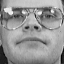

In [16]:
im = Image.fromarray(images[359] * 256)
new_im = im.convert('RGB')

display(new_im)

# Вариант 3

Построить модель линейной регрессии на имеющихся данных

In [17]:
import matplotlib.pyplot as plt

df_x = pd.read_csv('x.csv')
df_y = pd.read_csv('y.csv')

df_x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [18]:
df_x = df_x.rename({'Unnamed: 0': "first"}, axis=1)
df_y = df_y.rename({'Unnamed: 0': "first"}, axis=1)

res = pd.merge(df_x, df_y, on = 'first' ) # , on=0)

In [19]:
df_res = res.iloc[:, [1,2]]
df_res.head()

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


Зашумим входные данные

In [20]:
noise = np.random.randint(-100, 340, size=20) / 10
df_res['0_y'] = df_res['0_y'] + noise

<ipython-input-20-aa757312d54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['0_y'] = df_res['0_y'] + noise


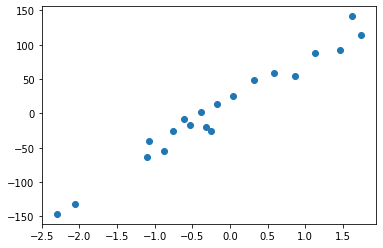

In [21]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.show()

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

(В конце вашего ноутбука укажите следующие данные)

По задачам классификации:

1.  Вывести метрики классификации на тестовом множестве: accuracy, precision, recall и f1-score(для бинарной) и метрик качества для каждого класса, в случае использования датасета с лицами.
2.  Обосновать выбранное соотношение train/test на основе построения кривых обучения (или понятного вывода результатов эксперимента) 



По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.

